# Определение перспективного тарифа для телеком-компании
В компании «Мегалайн» — федерального оператора сотовой связи клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Необходимо сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год.
Проанализируем поведение клиентов, сделаем вывод — какой тариф лучше оставить для дальнейшего развития компании.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файлов" data-toc-modified-id="Изучение-данных-из-файлов-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файлов</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Подготовка-таблицы-users" data-toc-modified-id="Подготовка-таблицы-users-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Подготовка таблицы <code>users</code></a></span></li><li><span><a href="#Подготовка-таблицы-calls" data-toc-modified-id="Подготовка-таблицы-calls-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Подготовка таблицы <code>calls</code></a></span></li><li><span><a href="#Подготовка-таблицы-messages" data-toc-modified-id="Подготовка-таблицы-messages-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Подготовка таблицы <code>messages</code></a></span></li><li><span><a href="#Подготовка-таблицы-internet" data-toc-modified-id="Подготовка-таблицы-internet-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Подготовка таблицы <code>internet</code></a></span></li><li><span><a href="#Обьединение-таблиц:" data-toc-modified-id="Обьединение-таблиц:-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Обьединение таблиц:</a></span></li><li><span><a href="#Рассчет-помесечной-выручки-с-каждого-пользователя" data-toc-modified-id="Рассчет-помесечной-выручки-с-каждого-пользователя-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Рассчет помесечной выручки с каждого пользователя</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-потраченных-минут-по-месяцам." data-toc-modified-id="Анализ-потраченных-минут-по-месяцам.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Анализ потраченных минут по месяцам.</a></span></li><li><span><a href="#Анализ-отправленных-сообщений-по-месяцам" data-toc-modified-id="Анализ-отправленных-сообщений-по-месяцам-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Анализ отправленных сообщений по месяцам</a></span></li><li><span><a href="#Анализ-потраченного-интернет-трафика-по-месяцам" data-toc-modified-id="Анализ-потраченного-интернет-трафика-по-месяцам-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Анализ потраченного интернет-трафика по месяцам</a></span></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Гипотеза:-средняя-выручка-пользователей-тарифов-«Ультра»-и-«Смарт»-различаются" data-toc-modified-id="Гипотеза:-средняя-выручка-пользователей-тарифов-«Ультра»-и-«Смарт»-различаются-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются</a></span></li><li><span><a href="#Гипотеза:-средняя-выручка-пользователей-из-Москвы-отличается-от-выручки-пользователей-из-других-регионов." data-toc-modified-id="Гипотеза:-средняя-выручка-пользователей-из-Москвы-отличается-от-выручки-пользователей-из-других-регионов.-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Гипотеза: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Изучение данных из файлов

In [69]:
import pandas as pd # импорт библиотеки pandas
import numpy as np # импорт библиотеки numpy
import matplotlib.pyplot as plt # импорт библиотеки matplotlib
from scipy import stats as st # импорт модуля scipy.stats из библиотеки scipy

In [70]:
users = pd.read_csv('users.csv')
users.head(10) 

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [71]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Описание колонок таблицы `users` согласно документации к данным:
* `user_id` — уникальный идентификатор пользователя
* `first_name` — имя пользователя
* `last_name` — фамилия пользователя
* `age` — возраст пользователя (годы)
* `reg_date` — дата подключения тарифа (день, месяц, год)
* `churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* `city` — город проживания пользователя
* `tariff` — название тарифного плана

In [72]:
calls = pd.read_csv('calls.csv')
calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [73]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Описание колонок таблицы `calls` согласно документации к данным:
* `id` — уникальный номер звонка
* `call_date` — дата звонка
* `duration` — длительность звонка в минутах
* `user_id` — идентификатор пользователя, сделавшего звонок

In [74]:
messages = pd.read_csv('messages.csv')
messages.head(10)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [75]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Описание колонок таблицы `messages` согласно документации к данным:
* `id` — уникальный номер сообщения
* `message_date` — дата сообщения
* `user_id` — идентификатор пользователя, отправившего сообщение

In [76]:
internet = pd.read_csv('internet.csv', index_col=0)
internet.head(10)

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
5,1000_5,399.97,2018-10-02,1000
6,1000_6,540.08,2018-09-07,1000
7,1000_7,415.70,2018-07-11,1000
8,1000_8,505.40,2018-10-08,1000
9,1000_9,345.54,2018-09-03,1000


In [77]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


Описание колонок таблицы `internet` согласно документации к данным:
* `id` — уникальный номер сессии
* `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах)
* `session_date` — дата интернет-сессии
* `user_id` — идентификатор пользователя

In [78]:
tariffs = pd.read_csv('tariffs.csv')
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Описание колонок таблицы `tariffs` согласно документации к данным:
* `tariff_name` — название тарифа
* `rub_monthly_fee` — ежемесячная абонентская плата в рублях
* `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату
* `messages_included` — количество сообщений в месяц, включённых в абонентскую плату
* `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета
* `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

**Вывод:**

Получили данные в виде 5 таблиц в которых информация о пользователях, совершенных звонках, отправленных сообщениях, израсходованном интернет трафике и тарифах оператора. В дальнейшем изменим типы данных и подготовим таблицы для объединения в один датасет.

## Подготовка данных

### Подготовка таблицы `users`

Заменим тип данных в колонке `reg_date` таблицы `users` с типа `object` на тип `datetime64`:

In [79]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format = '%Y-%m-%d')

### Подготовка таблицы `calls`

Заменим тип данных в колонке `call_date` таблицы `calls` с типа `object` на тип `datetime64`:

In [80]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')

Округлим длительность звонка `duration` до целых минут в большую сторону т.к. это предусмотренно оператором связи:

In [81]:
calls['duration'] = np.ceil(calls['duration'])

Заменим тип данных на `int64` в столбце `duration` 

In [82]:
calls = calls.astype({'duration':'int64'})

Добавим в таблицу месяц в который совершен звонок:

In [83]:
calls['month'] = pd.DatetimeIndex(calls['call_date']).month

По условиям проекта нам нужно посчитать количество сделанных звонков и израсходованных минут разговора каждого пользователя по месяцам, для этого сгруппируем таблицу `calls` по `user_id` и `month_calls`:

In [84]:
calls = calls.groupby(by = ['user_id','month'])['duration'].agg(['sum','count']).reset_index()

Пеименуем столбцы получившейся таблицы:

In [85]:
calls.rename(columns = {'sum' : 'sum_duration', 'count' : 'count_duration'}, inplace = True)
calls

,user_id,month,sum_duration,count_duration
0,1000,5,159,22
1,1000,6,172,43
2,1000,7,340,47
3,1000,8,408,52
4,1000,9,466,58
...,...,...,...,...
3169,1498,10,247,41
3170,1499,9,70,9
3171,1499,10,449,68
3172,1499,11,612,74


### Подготовка таблицы `messages`

Заменим тип данных в колонке `message_date` таблицы `messages` с типа `object` на тип `datetime64`:

In [86]:
messages['message_date'] = messages['message_date'].astype('datetime64')

Добавим в таблицу месяц в который отправленно сообщение:

In [87]:
messages['month'] = pd.DatetimeIndex(messages['message_date']).month

По условиям проекта нам нужно посчитать количество отправленных сообщений каждого пользователя по месяцам, для этого сгруппируем таблицу `messages` по `user_id` и `month_message`:

In [88]:
messages = messages.groupby(by = ['user_id', 'month'])['id'].count().reset_index()

Переименуем столбцы получившейся таблицы:

In [89]:
messages.rename(columns = {'id':'count_message'}, inplace = True)
messages

,user_id,month,count_message
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


### Подготовка таблицы `internet`

Заменим тип данных в колонке `session_date` таблицы `internet` с типа `object` на тип `datetime64`:

In [90]:
internet['session_date'] = internet['session_date'].astype('datetime64')

Добавим в таблицу месяц в который происходила сессия:

In [91]:
internet['month'] = pd.DatetimeIndex(internet['session_date']).month

По условиям проекта нам нужно посчитать объем израсходованного интернет-трафика каждого пользователя по месяцам, для этого сгруппируем таблицу `internet` по `user_id` и `month_session`:

In [92]:
internet = internet.groupby(by = ['user_id', 'month'])['mb_used'].sum().reset_index()
internet

,user_id,month,mb_used
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91
...,...,...,...
3198,1498,10,20579.36
3199,1499,9,1845.75
3200,1499,10,17788.51
3201,1499,11,17963.31


### Обьединение таблиц:

Обьединим таблицы `calls`, `messages` и `internet` в один датафрейм по столбцам `user_id` и `user_id`. Результат сохраним в переменную `df`:

In [93]:
df = calls.merge(messages, on = ['user_id', 'month'], how='outer')
df = df.merge(internet, on = ['user_id', 'month'], how='outer')

Обьединим даблицы `users` и `tariffs` в один датафрейм, результат сохраним в переменной `df1`:

In [94]:
# переименуем колонку tariff_name в tariff для дальнейшего объединения
tariffs.rename(columns = {'tariff_name':'tariff'}, inplace = True) 

In [95]:
df1 = users.merge(tariffs, on = 'tariff', how='outer')

Обьедимим таблицы `df1` и `df` по столбцу `user_id` и сохраним в `df`, в результате у нас получится один датафрейм в котором есть все необходимые данные для дальнейших рассчетов и анализа.

In [96]:
df = df1.merge(df, on = 'user_id', how='outer')

Заменим типы данных некоторых столбцов таблицы `df` c `float64` на `Int64`:

In [97]:
df = df.astype({'month':'Int64',
                'sum_duration':'Int64',
                'count_duration':'Int64',
                'count_message':'Int64'}
)

In [98]:
df.head(10) # выведем на экран итоговую таблицу

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,month,sum_duration,count_duration,count_message,mb_used
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,5,159,22,22,2253.49
1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,6,172,43,60,23233.77
2,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,7,340,47,75,14003.64
3,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,8,408,52,81,14055.93
4,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,9,466,58,57,14568.91
5,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,10,350,57,73,14702.49
6,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,11,338,43,58,14756.47
7,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,12,333,46,70,9817.61
8,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra,1000,30720,3000,1950,150,1,1,8,380,55,37,8565.21
9,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra,1000,30720,3000,1950,150,1,1,9,961,134,91,12468.87


Описание колонок таблицы `df`:
* `user_id` — уникальный идентификатор пользователя
* `age` — возраст пользователя (годы)
* `churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* `city` — город проживания пользователя
* `first_name` — имя пользователя
* `last_name` — фамилия пользователя
* `reg_date` — дата подключения тарифа (день, месяц, год)
* `tariff` — название тарифного плана
* `messages_included` — количество сообщений в месяц, включённых в абонентскую плату
* `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату
* `rub_monthly_fee` — ежемесячная абонентская плата в рублях
* `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)
* `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета
* `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* `month` — месяц
* `sum_duration` — длительность звонков в минутах за месяц
* `count_duration` — колличество звонков за месяц
* `count_message` — колличество сообщений за месяц
* `mb_used` — объём потраченного за месяц интернет-трафика (в мегабайтах)

###  Рассчет помесечной выручки с каждого пользователя

Переведём израсходованный трафик из мегабайты в гигабайты, округлим до целых значений в большую сторону(по условиям оператора) и сохраним результат в новой колонке `gb_used`:

In [99]:
df['gb_used'] = df['mb_used']/1024
df['gb_used'] = np.ceil(df['gb_used'])

Переведём объём интернет-трафика, включённого в абонентскую плату из мегабайт в гигабайты и сохраним результат в новой колонке `gb_per_month_included`:

In [100]:
df['gb_per_month_included'] = df['mb_per_month_included']/1024

Замена типов данных:

In [101]:
df = df.astype({'gb_per_month_included':'int64', 'gb_used':'Int64'})

In [102]:
pd.set_option('display.max_columns', None) # команда для отображения всех колонок в таблицах

Напишем функцию для рассчета помесечной выручки с каждого пользователя

Для корректной работы функции заполним пропущенные значения:

In [103]:
df['sum_duration'] = df['sum_duration'].fillna(0)
df['count_message'] = df['count_message'].fillna(0)
df['gb_used'] = df['gb_used'].fillna(0)

In [104]:
def income(row):
    calls = 0
    messages = 0
    internet = 0
    if (row['sum_duration'] - row['minutes_included']) <= 0:
        calls = 0
    elif (row['sum_duration'] - row['minutes_included']) > 0:
        calls = row['sum_duration'] - row['minutes_included']
    
    if (row['count_message'] - row['messages_included']) <= 0:
        messages = 0
    elif (row['count_message'] - row['messages_included']) > 0:
        messages = row['count_message'] - row['messages_included']
        
    if (row['gb_used'] - row['gb_per_month_included']) <= 0:
        internet = 0
    elif (row['gb_used'] - row['gb_per_month_included']) > 0:
        internet = row['gb_used'] - row['gb_per_month_included']
        
    result = ((row['rub_per_minute'] * calls) 
    + (row['rub_per_message'] * messages) 
    + (row['rub_per_gb'] * internet)
    + (row['rub_monthly_fee']))
    
    return result
        

Применим функцию для всех строк датасета:

In [105]:
df['income'] = df.apply(income, axis =1)

**Вывод:**

Сгруппировали таблицы с трафиком по пользователям и месяцам в которые этот трафик расходовался и обьединили эти данные в один датасет, а так же произвели рассчет помесечной выручки с каждого пользователя.

## Анализ данных

### Анализ потраченных минут по месяцам.

С помощью фильтра создадим две таблицы `df_ultra` и `df_smart` с разными тарифами:

In [106]:
df_ultra = df.query('tariff == "ultra"')
df_smart = df.query('tariff == "smart"')

**Тариф `ultra`**

Подсчёт среднего, дисперсии, стандартного отклонения для потраченных минут по месяцам:

In [107]:
df_ultra.groupby('month')['sum_duration'].agg(['mean','var','std']).reset_index() 

,month,mean,var,std
0,1,428.111111,72769.361111,269.757968
1,2,297.125,87919.679348,296.512528
2,3,489.648649,111384.900901,333.743765
3,4,458.018182,71653.870034,267.682405
4,5,510.328358,83870.193578,289.603511
5,6,479.702381,91535.9465,302.549081
6,7,545.791209,94322.278144,307.119322
7,8,510.775701,97956.496385,312.980026
8,9,539.443478,105716.775286,325.141162
9,10,558.081301,106464.5835,326.289110


Подсчёт общих метрик:

In [108]:
df_ultra['sum_duration'].agg(['mean','var','std']).reset_index() 

,index,sum_duration
0,mean,526.089249
1,var,101052.493549
2,std,317.887549


**Тариф `smart`**

Подсчёт среднего, дисперсии, стандартного отклонения для потраченных минут по месяцам:

In [109]:
df_smart.groupby('month')['sum_duration'].agg(['mean','var','std']).reset_index() 

,month,mean,var,std
0,1,203.852941,23787.341355,154.231454
1,2,298.689655,36412.287961,190.820041
2,3,390.051948,36823.155161,191.893604
3,4,367.133929,34778.207127,186.489161
4,5,387.361702,34820.061094,186.601343
5,6,395.640244,30742.918861,175.336587
6,7,408.353234,32250.269602,179.583601
7,8,421.468085,34793.583379,186.530382
8,9,428.611538,33535.342723,183.126576
9,10,426.136054,35392.336375,188.128510


Подсчёт общих метрик:

In [110]:
df_smart['sum_duration'].agg(['mean','var','std']).reset_index() 

,index,sum_duration
0,mean,417.747534
1,var,36281.393836
2,std,190.476754


Посмотрим на общее распределение потраченных минут в разные месяца для двух разных тарифов с помощью гистограмм:

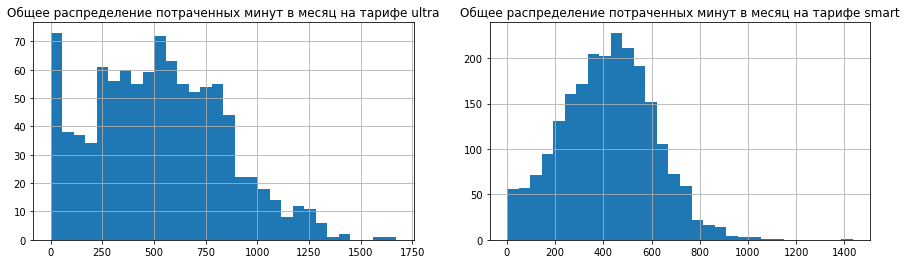

In [111]:
fig, axes = plt.subplots(1,2, figsize=(15,4))

df_ultra['sum_duration'].hist(ax=axes[0], bins=30)
df_smart['sum_duration'].hist(ax=axes[1], bins=30)


axes[0].set_title('Общее распределение потраченных минут в месяц на тарифе ultra')
axes[1].set_title('Общее распределение потраченных минут в месяц на тарифе smart')


plt.show()

На тарифе `ultra`достаточно много пользователей тратят 250-850 минут, так же видно что большое колличество пользователей тратят до 20 минут, более 800 минут расходуется редко. На тарифе `smart` большинство пользователей тратят 250-600 минут, менее 100 минут в месяц пользователи тратят достаточно редко, еще реже встречаются случае с расходом более 800 минут.

### Анализ отправленных сообщений по месяцам

**Тариф `ultra`**

Подсчёт среднего, дисперсии, стандартного отклонения для отправленных сообщений по месяцам:

In [113]:
df_ultra.groupby('month')['count_message'].agg(['mean','var','std']).reset_index()

,month,mean,var,std
0,1,33.777778,940.694444,30.670742
1,2,21.958333,716.824275,26.773574
2,3,32.297297,1732.381381,41.621886
3,4,31.563636,1407.287542,37.513831
4,5,37.850746,1624.644052,40.306874
5,6,41.72619,1986.297619,44.567899
6,7,49.846154,2372.042735,48.703621
7,8,48.439252,2171.739199,46.601923
8,9,52.286957,2152.85553,46.398874
9,10,58.430894,2697.181661,51.934398


Подсчёт общих метрик:

In [114]:
df_ultra['count_message'].agg(['mean','var','std']).reset_index()

,index,count_message
0,mean,49.313387
1,var,2285.417425
2,std,47.806040


**Тариф `smart`**

Подсчёт среднего, дисперсии, стандартного отклонения для отправленных сообщений по месяцам:

In [115]:
df_smart.groupby('month')['count_message'].agg(['mean','var','std']).reset_index()

,month,mean,var,std
0,1,18.235294,262.367201,16.197753
1,2,24.086207,473.097701,21.750809
2,3,31.857143,718.492481,26.804710
3,4,30.741071,602.139559,24.538532
4,5,33.77305,730.990983,27.036845
5,6,33.402439,806.806374,28.404337
6,7,33.751244,799.887811,28.282288
7,8,33.638298,838.257501,28.952677
8,9,33.638462,790.61782,28.117927
9,10,33.765306,816.111966,28.567673


Подсчёт общих метрик:

In [116]:
df_smart['count_message'].agg(['mean','var','std']).reset_index()

,index,count_message
0,mean,33.369058
1,var,796.955256
2,std,28.230396


Посмотрим на общее распределение потраченных сообщений в разные месяца для двух разных тарифов с помощью гистограмм:

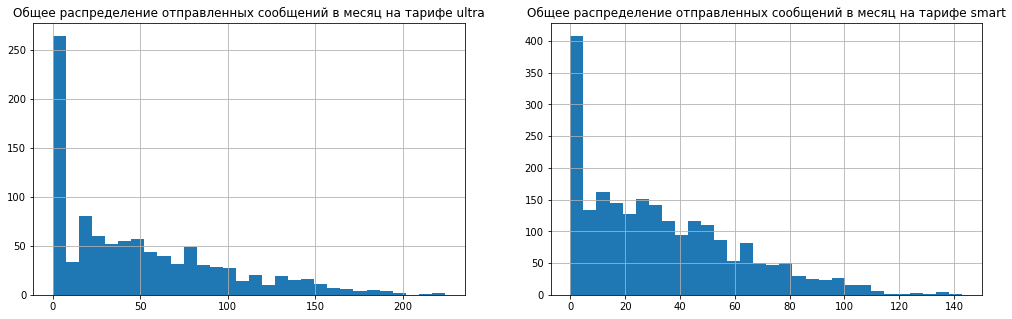

In [117]:
fig, axes = plt.subplots(1,2, figsize=(17,5))

df_ultra['count_message'].hist(ax=axes[0], bins=30)
df_smart['count_message'].hist(ax=axes[1], bins=30)

axes[0].set_title('Общее распределение отправленных сообщений в месяц на тарифе ultra')
axes[1].set_title('Общее распределение отправленных сообщений в месяц на тарифе smart')

plt.show()

На тарифе `ultra` достаточно много пользователей отправляют до 10 сообщений в месяц, более 150 сообщений в месяц отправляют достаточно редко. На тарифе `smart` достаточно многопользователей отправляют до 5 сообщений в месяц, более 100 сообщений очень редко.

### Анализ потраченного интернет-трафика по месяцам

**Тариф `ultra`**

Подсчёт среднего, дисперсии, стандартного отклонения для потраченного интернет-трафика:

In [119]:
df_ultra.groupby('month')['gb_used'].agg(['mean','var','std']).reset_index()

,month,mean,var,std
0,1,13.222222,44.444444,6.666667
1,2,12.0,109.130435,10.446551
2,3,17.648649,114.345345,10.693238
3,4,16.963636,89.443098,9.457436
4,5,19.373134,95.631389,9.779130
5,6,18.940476,82.394005,9.077114
6,7,20.505495,96.430525,9.819905
7,8,19.598131,105.148298,10.254184
8,9,19.243478,86.255988,9.287410
9,10,20.065041,91.25803,9.552907


Подсчёт общих метрик:

In [120]:
df_ultra['gb_used'].agg(['mean','var','std']).reset_index()

,index,gb_used
0,mean,19.474645
1,var,97.378544
2,std,9.868057


**Тариф `smart`**

Подсчёт среднего, дисперсии, стандартного отклонения для потраченного интернет-трафика:

In [121]:
df_smart.groupby('month')['gb_used'].agg(['mean','var','std']).reset_index()

,month,mean,var,std
0,1,8.735294,39.412656,6.277950
1,2,11.844828,37.150938,6.095157
2,3,15.233766,32.549897,5.705252
3,4,13.625,31.29955,5.594600
4,5,15.907801,34.37001,5.862594
5,6,15.95122,31.911716,5.649046
6,7,15.875622,33.419453,5.780956
7,8,16.73617,30.041207,5.480986
8,9,16.392308,25.88411,5.087643
9,10,16.880952,32.897042,5.735594


Посчёт общих метрик:

In [122]:
df_smart['gb_used'].agg(['mean','var','std']).reset_index()

,index,gb_used
0,mean,16.321525
1,var,33.133453
2,std,5.756167


Посмотри на общее распределенение потраченного интернет трафика в месяц для двух разных тарифов:

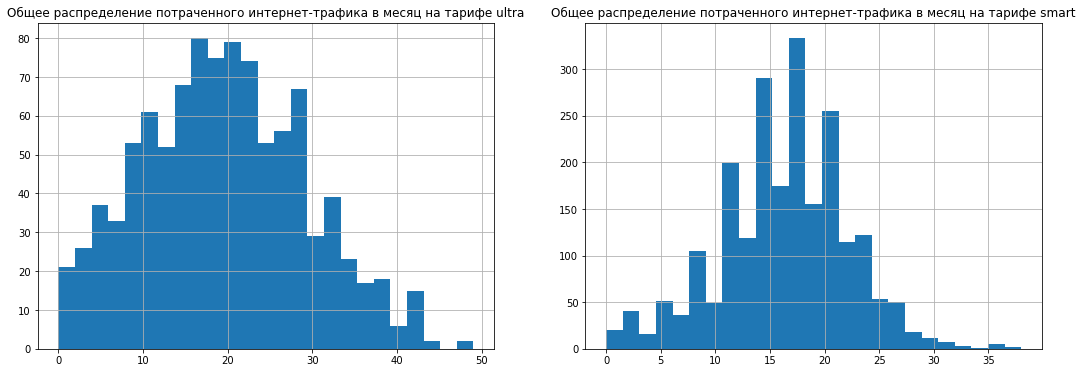

In [123]:
fig, axes = plt.subplots(1,2, figsize=(18,6))

df_ultra['gb_used'].hist(ax=axes[0], bins=25)
df_smart['gb_used'].hist(ax=axes[1], bins=25)


axes[0].set_title('Общее распределение потраченного интернет-трафика в месяц на тарифе ultra')
axes[1].set_title('Общее распределение потраченного интернет-трафика в месяц на тарифе smart')


plt.show()

На тарифе `ultra` большинство пользователей тратит 8-30 Гб интернет-трафика, на тарифе `smart` 11-25 Гб интерент-трафика.

**Вывод:**

На основе проведенного анализа можно сделать вывод, что для покрытия потребностей большинства пользователей тарифа `ultra` необходимо 850 минут, 150 сообщений и 30 Гб интернет-трафика в месяц. Для покрытия потребностей большинства пользователей тарифа `smart` необходимо 600 минут, 100 сообщения и 25 Гб интернет-трафика в месяц.

## Проверка гипотез

### Гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

Сформулируем нулевую и альтернативную гипотезу:
* H₀ - средняя выручка пользователей тарифов «Ультра» и «Смарт» равна
* H₁ - редняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

С помощью фильтра сохраним в переменные `df_ultra` и `df_smart` данные с выручкой по каждому тарифу:

In [125]:
df_ultra = df_ultra['income']
df_smart = df_smart['income']

Для проверки гипотезы проведем t-тест с помощью метода `scipy.stats.ttest_ind()`:

Проверяем нулевую гипотезу

In [126]:
alpha = .05 # зададим критический уровень статистической значимости

results = st.ttest_ind(df_ultra, df_smart)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 8.081909555489933e-161
Отвергаем нулевую гипотезу


На основе теста можем предположить, что альтернативная гипотеза верна.

### Гипотеза: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Сформулируем нулевую и альтернативную гипотезу:
* H₀ - средняя выручка пользователей из Москвы равна выручке пользователей из других регионов
* H₁ - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Сохраним в переменные moscow_city и other_city выручку опетатора по Москве и по другим городам соответственно:

In [127]:
moscow_city = df.query('city == "Москва"')['income']
other_city = df.query('city != "Москва"')['income']

Для проверки гипотезы проведем t-тест с помощью метода `scipy.stats.ttest_ind()`:

Проверяем нулевую гипотезу

In [128]:
alpha = .05 # зададим критический уровень статистической значимости

results = st.ttest_ind(moscow_city, other_city)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.5400751614511182
Не получилось отвергнуть нулевую гипотезу


**Вывод:**

Можем предположить, что **гипотеза о различии средней выручки пользователей тарифов «Ультра» и «Смарт»**
`верна`, а гипотеза **средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов** `не верна`.

## Общий вывод

Провели анализ данных на основе которого можно сделать вывод, что для покрытия потребностей большинства пользователей тарифа `ultra` необходимо 850 минут, 150 сообщений и 30 Гб интернет-трафика в месяц. Для покрытия потребностей большинства пользователей тарифа `smart` необходимо 600 минут, 100 сообщения и 25 Гб интернет-трафика в месяц. Проверили две гипотезы о средней выручке с помощью t-теста:
* средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются
* средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов


Гипотезу о различии средней выручки на разных тарифах `не отвергаем`, а гипотезу об отличии средней выручки пользователей из Москвы и пользователей из других регионов, `отвергаем`. 

Я считаю, что для компании целесообразнее продвигать тариф `smart`, продвигать низкостоящие тарифы проще и скорее всего на такой тариф получится привлечь больше клиентов(суммарная выручка `smart` больше, чем `ultra`, поскольку там больше клиентов). При этом множество пользоваталей привышают установленные лимиты трафика и оплачивают услуги сверх тарифного пакета. Самая дорогая услуга сверх тарифного пакета - интернет-трафик и при всём этом пользователи компании «Мегалайн», в большинстве случае тратят гораздо больше трафика, чем установленно лимитом.